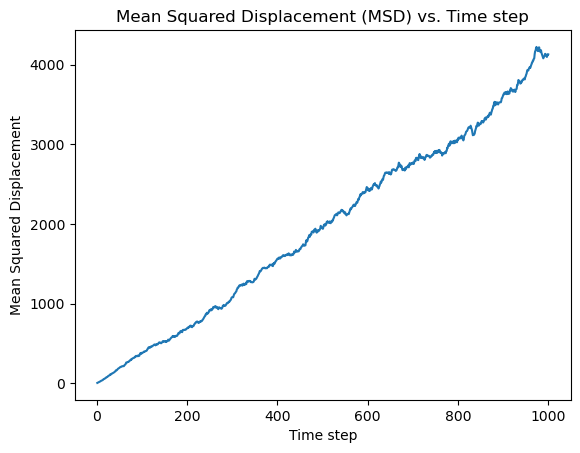

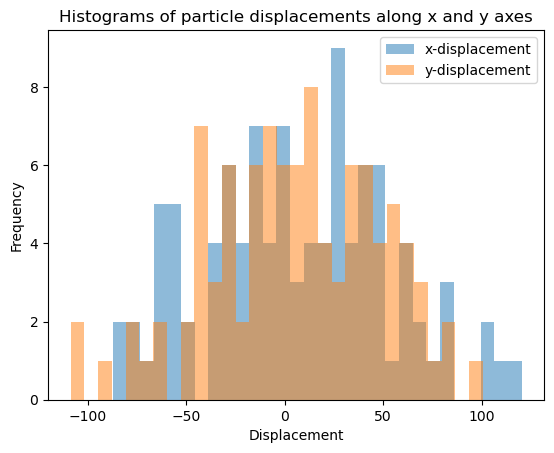

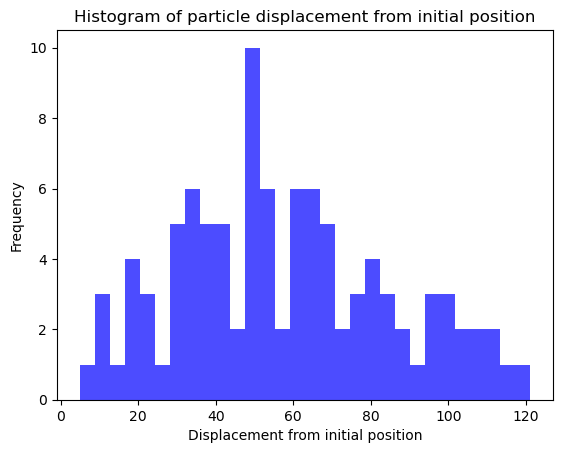

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps = 1000  # Number of steps in the simulation
num_particles = 100  # Number of particles
delta_t = 1.0  # Time step (arbitrary units)
diffusion_coefficient = 1.0  # Diffusion coefficient (arbitrary units)

# Arrays to store displacements
x_displacements = np.zeros((num_particles, num_steps))
y_displacements = np.zeros((num_particles, num_steps))

# Perform simulation
for particle in range(num_particles):
    x = 0.0
    y = 0.0
    
    for step in range(num_steps):
        # Generate random displacement for x and y
        dx = np.sqrt(2 * diffusion_coefficient * delta_t) * np.random.normal()
        dy = np.sqrt(2 * diffusion_coefficient * delta_t) * np.random.normal()
        
        # Update particle position
        x += dx
        y += dy
        
        # Store displacements
        x_displacements[particle, step] = x
        y_displacements[particle, step] = y

# Calculate mean squared displacement (MSD)
time_points = np.arange(1, num_steps + 1)
msd = np.zeros(num_steps)
for step in range(num_steps):
    msd[step] = np.mean((x_displacements[:, step] ** 2) + (y_displacements[:, step] ** 2))

# Plot MSD
plt.figure()
plt.plot(time_points, msd)
plt.xlabel('Time step')
plt.ylabel('Mean Squared Displacement')
plt.title('Mean Squared Displacement (MSD) vs. Time step')
plt.show()

# Plot histograms of displacements along x and y axes
plt.figure()
plt.hist(x_displacements[:, -1], bins=30, alpha=0.5, label='x-displacement')
plt.hist(y_displacements[:, -1], bins=30, alpha=0.5, label='y-displacement')
plt.xlabel('Displacement')
plt.ylabel('Frequency')
plt.title('Histograms of particle displacements along x and y axes')
plt.legend()
plt.show()

# Calculate and plot histogram of particle displacement from the initial position
final_positions = np.sqrt(x_displacements[:, -1] ** 2 + y_displacements[:, -1] ** 2)
plt.figure()
plt.hist(final_positions, bins=30, color='blue', alpha=0.7)
plt.xlabel('Displacement from initial position')
plt.ylabel('Frequency')
plt.title('Histogram of particle displacement from initial position')
plt.show()


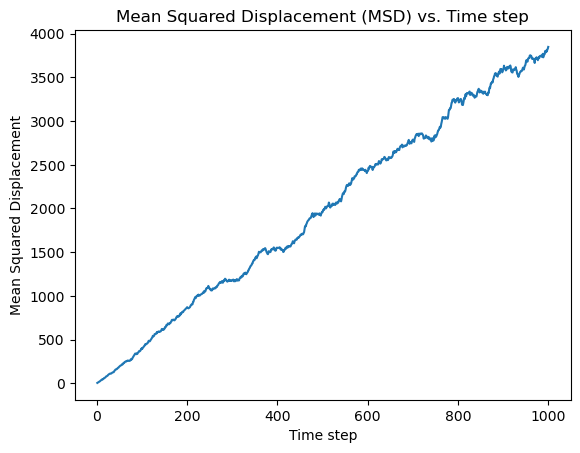

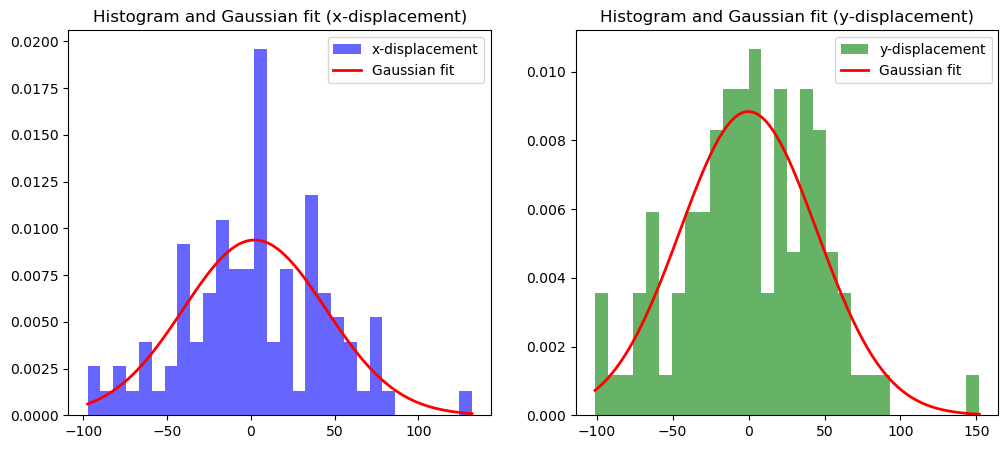

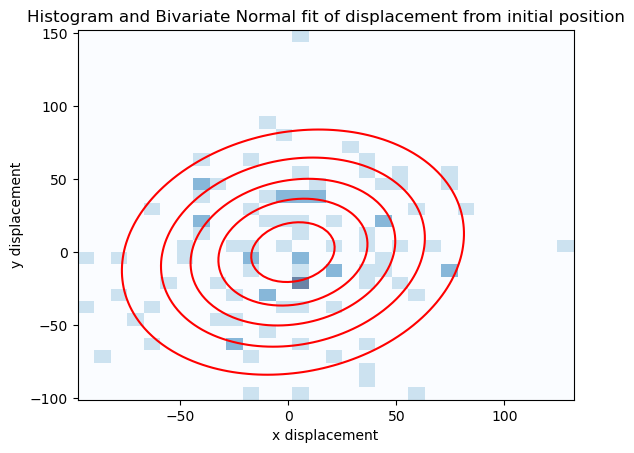

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

# Parameters
num_steps = 1000  # Number of steps in the simulation
num_particles = 100  # Number of particles
delta_t = 1.0  # Time step (arbitrary units)
diffusion_coefficient = 1.0  # Diffusion coefficient (arbitrary units)

# Arrays to store displacements
x_displacements = np.zeros((num_particles, num_steps))
y_displacements = np.zeros((num_particles, num_steps))

# Perform simulation
for particle in range(num_particles):
    x = 0.0
    y = 0.0
    
    for step in range(num_steps):
        # Generate random displacement for x and y
        dx = np.sqrt(2 * diffusion_coefficient * delta_t) * np.random.normal()
        dy = np.sqrt(2 * diffusion_coefficient * delta_t) * np.random.normal()
        
        # Update particle position
        x += dx
        y += dy
        
        # Store displacements
        x_displacements[particle, step] = x
        y_displacements[particle, step] = y

# Calculate the final displacements and plot histograms of the x and y axes
# Mean squared displacement (MSD)
time_points = np.arange(1, num_steps + 1)
msd = np.zeros(num_steps)
for step in range(num_steps):
    msd[step] = np.mean((x_displacements[:, step] ** 2) + (y_displacements[:, step] ** 2))

# Plot MSD
plt.figure()
plt.plot(time_points, msd)
plt.xlabel('Time step')
plt.ylabel('Mean Squared Displacement')
plt.title('Mean Squared Displacement (MSD) vs. Time step')
plt.show()

# Plot histograms of displacements along x and y axes
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogram and Gaussian fit for x-displacement
axs[0].hist(x_displacements[:, -1], bins=30, density=True, alpha=0.6, color='b', label='x-displacement')
mu_x, sigma_x = norm.fit(x_displacements[:, -1])
x_vals = np.linspace(x_displacements[:, -1].min(), x_displacements[:, -1].max(), 100)
axs[0].plot(x_vals, norm.pdf(x_vals, mu_x, sigma_x), 'r', lw=2, label='Gaussian fit')
axs[0].set_title('Histogram and Gaussian fit (x-displacement)')
axs[0].legend()

# Histogram and Gaussian fit for y-displacement
axs[1].hist(y_displacements[:, -1], bins=30, density=True, alpha=0.6, color='g', label='y-displacement')
mu_y, sigma_y = norm.fit(y_displacements[:, -1])
y_vals = np.linspace(y_displacements[:, -1].min(), y_displacements[:, -1].max(), 100)
axs[1].plot(y_vals, norm.pdf(y_vals, mu_y, sigma_y), 'r', lw=2, label='Gaussian fit')
axs[1].set_title('Histogram and Gaussian fit (y-displacement)')
axs[1].legend()

plt.show()

# Fit a 2D Gaussian distribution to the final positions
mu = [mu_x, mu_y]
cov_matrix = np.cov(x_displacements[:, -1], y_displacements[:, -1])

# Create the multivariate normal distribution
mvn_dist = multivariate_normal(mean=mu, cov=cov_matrix)

# Plot histogram and bivariate normal fit for displacement from initial position
plt.figure()
plt.hist2d(x_displacements[:, -1], y_displacements[:, -1], bins=30, density=True, cmap='Blues', alpha=0.6)

# Create a meshgrid to evaluate the PDF of the multivariate normal distribution
x_min, x_max = x_displacements[:, -1].min(), x_displacements[:, -1].max()
y_min, y_max = y_displacements[:, -1].min(), y_displacements[:, -1].max()
x, y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
pos = np.dstack((x, y))

# Evaluate the PDF of the multivariate normal distribution
pdf_values = mvn_dist.pdf(pos)

# Plot the fitted bivariate normal distribution
plt.contour(x, y, pdf_values, colors='red', levels=5)
plt.xlabel('x displacement')
plt.ylabel('y displacement')
plt.title('Histogram and Bivariate Normal fit of displacement from initial position')

plt.show()


isotopic medium with certain viscosity

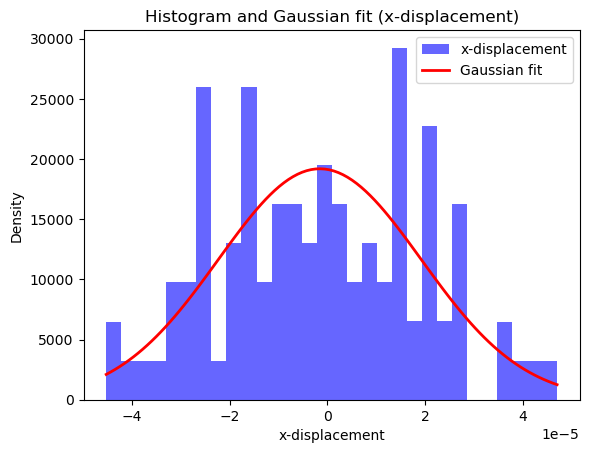

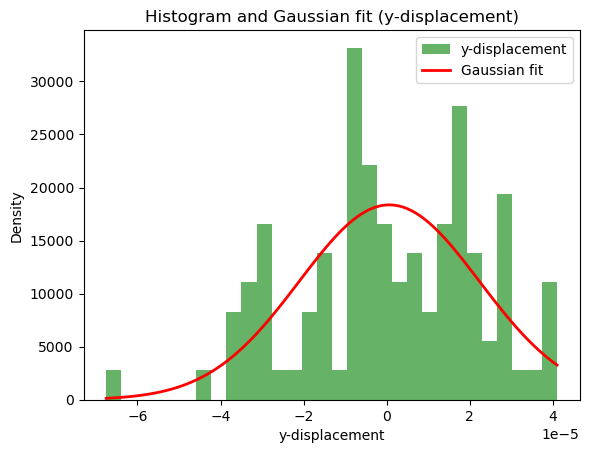

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
num_steps = 1000  # Number of steps in the simulation
num_particles = 100  # Number of particles
delta_t = 1.0  # Time step (arbitrary units)
temperature = 300  # Temperature in Kelvin
viscosity = 0.001  # Viscosity in Pa·s (e.g., water at room temperature)
particle_radius = 1e-6  # Particle radius in meters (e.g., 1 micron)

# Calculate the diffusion coefficient using the Stokes-Einstein equation
boltzmann_constant = 1.38e-23  # Boltzmann constant in J/K
diffusion_coefficient = boltzmann_constant * temperature / (6 * np.pi * viscosity * particle_radius)

# Arrays to store displacements
x_displacements = np.zeros((num_particles, num_steps))
y_displacements = np.zeros((num_particles, num_steps))

# Perform simulation
for particle in range(num_particles):
    x = 0.0
    y = 0.0
    
    for step in range(num_steps):
        # Calculate the standard deviation for the displacement
        std_dev = np.sqrt(2 * diffusion_coefficient * delta_t)
        
        # Generate random displacement for x and y using a normal distribution
        dx = std_dev * np.random.normal()
        dy = std_dev * np.random.normal()
        
        # Update particle position
        x += dx
        y += dy
        
        # Store displacements
        x_displacements[particle, step] = x
        y_displacements[particle, step] = y

# Calculate the final displacements and plot histograms of the x and y axes
# Histogram and Gaussian fit for x-displacement
plt.figure()
plt.hist(x_displacements[:, -1], bins=30, density=True, alpha=0.6, color='b', label='x-displacement')
mu_x, sigma_x = norm.fit(x_displacements[:, -1])
x_vals = np.linspace(x_displacements[:, -1].min(), x_displacements[:, -1].max(), 100)
plt.plot(x_vals, norm.pdf(x_vals, mu_x, sigma_x), 'r', lw=2, label='Gaussian fit')
plt.xlabel('x-displacement')
plt.ylabel('Density')
plt.title('Histogram and Gaussian fit (x-displacement)')
plt.legend()
plt.show()

# Histogram and Gaussian fit for y-displacement
plt.figure()
plt.hist(y_displacements[:, -1], bins=30, density=True, alpha=0.6, color='g', label='y-displacement')
mu_y, sigma_y = norm.fit(y_displacements[:, -1])
y_vals = np.linspace(y_displacements[:, -1].min(), y_displacements[:, -1].max(), 100)
plt.plot(y_vals, norm.pdf(y_vals, mu_y, sigma_y), 'r', lw=2, label='Gaussian fit')
plt.xlabel('y-displacement')
plt.ylabel('Density')
plt.title('Histogram and Gaussian fit (y-displacement)')
plt.legend()
plt.show()




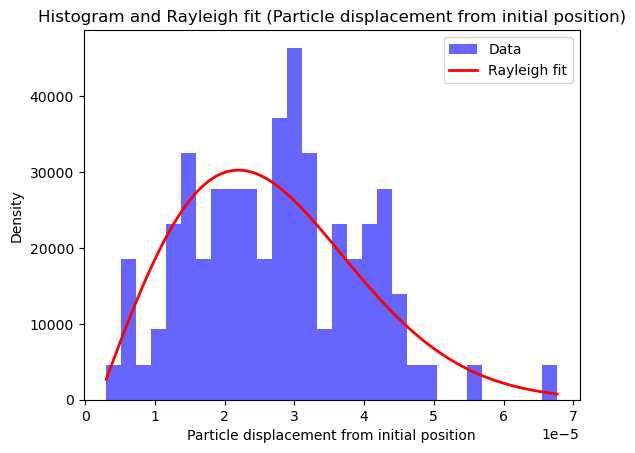

In [19]:
from scipy.stats import rayleigh

# Calculate final positions and plot histogram for particle displacement from initial position
final_positions = np.sqrt(x_displacements[:, -1] ** 2 + y_displacements[:, -1] ** 2)

# Plot the histogram for final displacements
plt.figure()
plt.hist(final_positions, bins=30, density=True, alpha=0.6, color='blue', label='Data')

# Fit a Rayleigh distribution to the final displacements
param = rayleigh.fit(final_positions)
x_vals = np.linspace(final_positions.min(), final_positions.max(), 100)
pdf_values = rayleigh.pdf(x_vals, *param)

# Plot the Rayleigh fit
plt.plot(x_vals, pdf_values, 'r', lw=2, label='Rayleigh fit')
plt.xlabel('Particle displacement from initial position')
plt.ylabel('Density')
plt.title('Histogram and Rayleigh fit (Particle displacement from initial position)')
plt.legend()
plt.show()

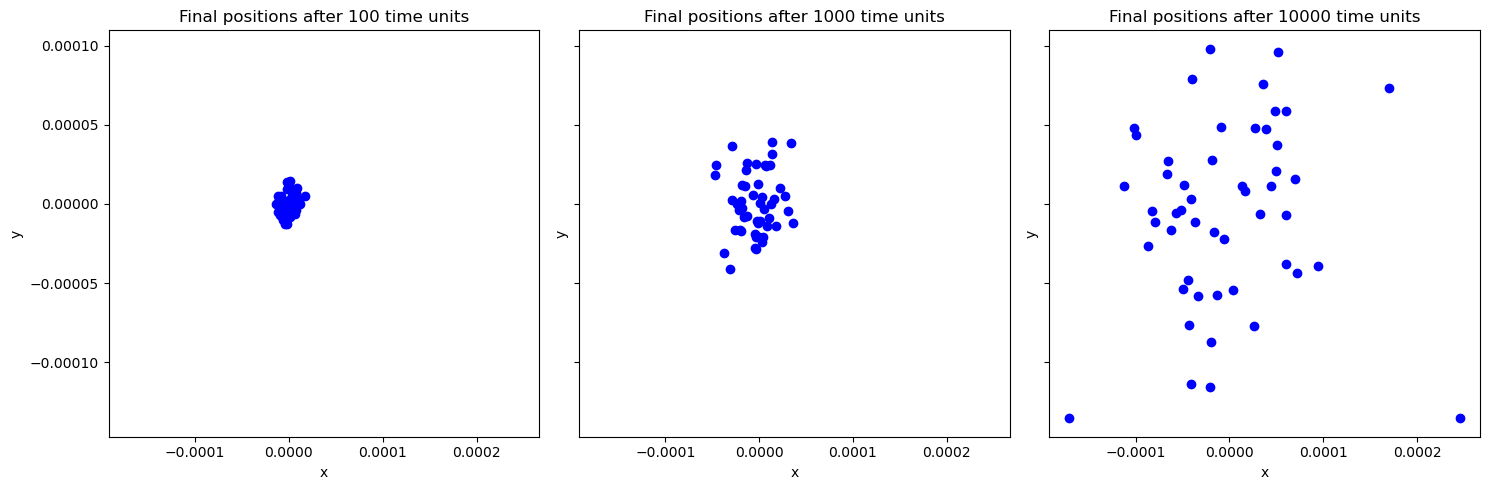

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_particles = 50  # Number of particles
time_units = [100, 1000, 10000]  # Time units to simulate
delta_t = 1.0  # Time step (arbitrary units)
temperature = 300  # Temperature in Kelvin
particle_radius = 1e-6  # Particle radius in meters (e.g., 1 micron)
viscosity = 0.001  # Isotropic viscosity in Pa·s

# Calculate the diffusion coefficient using the Stokes-Einstein equation
boltzmann_constant = 1.38e-23  # Boltzmann constant in J/K
diffusion_coefficient = boltzmann_constant * temperature / (6 * np.pi * viscosity * particle_radius)

# Define a function to simulate particle movements
def simulate_particles(num_particles, num_steps, diffusion_coefficient, delta_t):
    x_positions = np.zeros((num_particles, num_steps))
    y_positions = np.zeros((num_particles, num_steps))

    # Simulate the movement of each particle
    for particle in range(num_particles):
        x = 0.0
        y = 0.0
        
        for step in range(num_steps):
            # Calculate the standard deviation for the displacement
            std_dev = np.sqrt(2 * diffusion_coefficient * delta_t)
            
            # Generate random displacement using a normal distribution
            dx = std_dev * np.random.normal()
            dy = std_dev * np.random.normal()
            
            # Update particle position
            x += dx
            y += dy
            
            # Store the positions
            x_positions[particle, step] = x
            y_positions[particle, step] = y
            
    return x_positions, y_positions

# Initialize a figure
fig, axes = plt.subplots(1, len(time_units), figsize=(15, 5), sharex=True, sharey=True)

# Run simulations for the specified time units
for i, time_unit in enumerate(time_units):
    num_steps = int(time_unit / delta_t)  # Number of steps in the simulation
    x_positions, y_positions = simulate_particles(num_particles, num_steps, diffusion_coefficient, delta_t)
    
    # Plot the final positions of the particles
    axes[i].scatter(x_positions[:, -1], y_positions[:, -1], color='blue')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title(f'Final positions after {time_unit} time units')

    
# Set the axis limits to be the same for each subplot
x_min = min([axes[i].get_xlim()[0] for i in range(len(time_units))])
x_max = max([axes[i].get_xlim()[1] for i in range(len(time_units))])
y_min = min([axes[i].get_ylim()[0] for i in range(len(time_units))])
y_max = max([axes[i].get_ylim()[1] for i in range(len(time_units))])

for ax in axes:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# Display the plots
plt.tight_layout()
plt.show()


in LCs

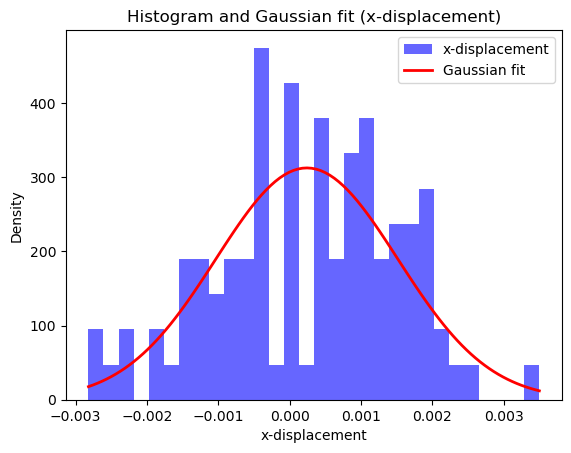

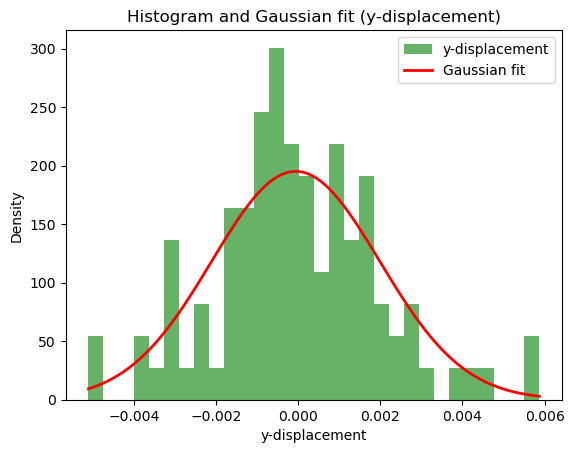

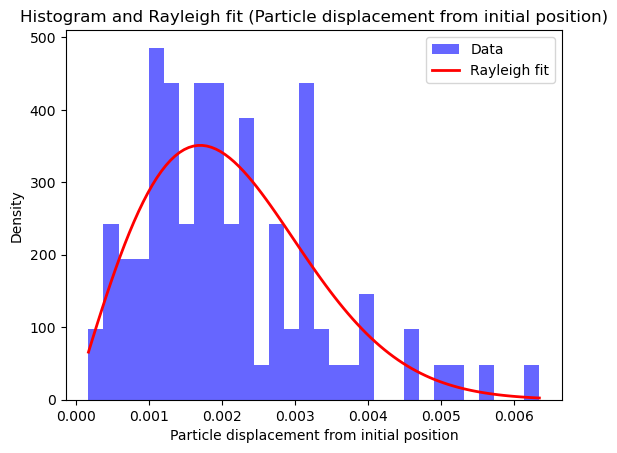

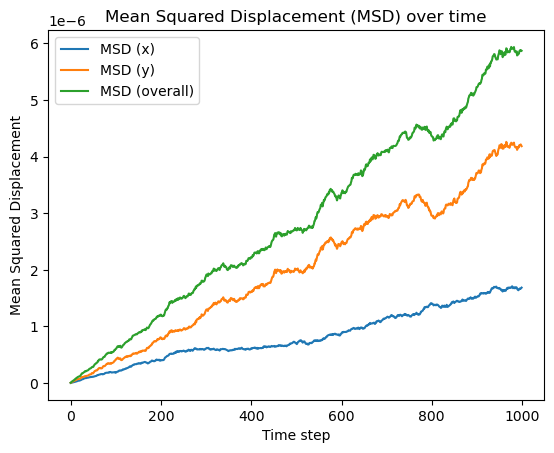

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, rayleigh

# Parameters
num_steps = 1000  # Number of steps in the simulation
num_particles = 100  # Number of particles
delta_t = 1.0  # Time step (arbitrary units)
temperature = 300  # Temperature in Kelvin

# Anisotropy of the liquid crystal (different diffusion coefficients in x and y)
diffusion_coefficient_x = 1.0e-9  # Diffusion coefficient in x-direction (in m^2/s)
diffusion_coefficient_y = 2.0e-9  # Diffusion coefficient in y-direction (in m^2/s)

# Arrays to store displacements
x_displacements = np.zeros((num_particles, num_steps))
y_displacements = np.zeros((num_particles, num_steps))

# Arrays to store mean squared displacement (MSD)
msd_x = np.zeros(num_steps)
msd_y = np.zeros(num_steps)
msd_overall = np.zeros(num_steps)

# Perform simulation
for particle in range(num_particles):
    x = 0.0
    y = 0.0
    
    for step in range(num_steps):
        # Generate random displacement for x and y using Gaussian distribution
        dx = np.sqrt(2 * diffusion_coefficient_x * delta_t) * np.random.normal()
        dy = np.sqrt(2 * diffusion_coefficient_y * delta_t) * np.random.normal()
        
        # Update particle position
        x += dx
        y += dy
        
        # Store displacements
        x_displacements[particle, step] = x
        y_displacements[particle, step] = y
        
        # Calculate MSD for the current step
        msd_x[step] += x**2
        msd_y[step] += y**2
        msd_overall[step] += x**2 + y**2

# Calculate the average MSD over all particles
msd_x /= num_particles
msd_y /= num_particles
msd_overall /= num_particles

# Calculate final displacements and plot histograms of x and y axes
final_x_displacements = x_displacements[:, -1]
final_y_displacements = y_displacements[:, -1]

# Plot histogram and Gaussian fit for x-displacement
plt.figure()
plt.hist(final_x_displacements, bins=30, density=True, alpha=0.6, color='b', label='x-displacement')
mu_x, sigma_x = norm.fit(final_x_displacements)
x_vals = np.linspace(final_x_displacements.min(), final_x_displacements.max(), 100)
plt.plot(x_vals, norm.pdf(x_vals, mu_x, sigma_x), 'r', lw=2, label='Gaussian fit')
plt.xlabel('x-displacement')
plt.ylabel('Density')
plt.title('Histogram and Gaussian fit (x-displacement)')
plt.legend()
plt.show()

# Plot histogram and Gaussian fit for y-displacement
plt.figure()
plt.hist(final_y_displacements, bins=30, density=True, alpha=0.6, color='g', label='y-displacement')
mu_y, sigma_y = norm.fit(final_y_displacements)
y_vals = np.linspace(final_y_displacements.min(), final_y_displacements.max(), 100)
plt.plot(y_vals, norm.pdf(y_vals, mu_y, sigma_y), 'r', lw=2, label='Gaussian fit')
plt.xlabel('y-displacement')
plt.ylabel('Density')
plt.title('Histogram and Gaussian fit (y-displacement)')
plt.legend()
plt.show()

# Calculate overall final displacements and plot histogram
final_positions = np.sqrt(final_x_displacements**2 + final_y_displacements**2)

# Plot histogram and Rayleigh fit for overall displacement
plt.figure()
plt.hist(final_positions, bins=30, density=True, alpha=0.6, color='blue', label='Data')
param = rayleigh.fit(final_positions)
x_vals = np.linspace(final_positions.min(), final_positions.max(), 100)
pdf_values = rayleigh.pdf(x_vals, *param)

plt.plot(x_vals, pdf_values, 'r', lw=2, label='Rayleigh fit')
plt.xlabel('Particle displacement from initial position')
plt.ylabel('Density')
plt.title('Histogram and Rayleigh fit (Particle displacement from initial position)')
plt.legend()
plt.show()

# Plot mean squared displacement (MSD) over time
plt.figure()
plt.plot(np.arange(num_steps), msd_x, label='MSD (x)')
plt.plot(np.arange(num_steps), msd_y, label='MSD (y)')
plt.plot(np.arange(num_steps), msd_overall, label='MSD (overall)')
plt.xlabel('Time step')
plt.ylabel('Mean Squared Displacement')
plt.title('Mean Squared Displacement (MSD) over time')
plt.legend()
plt.show()


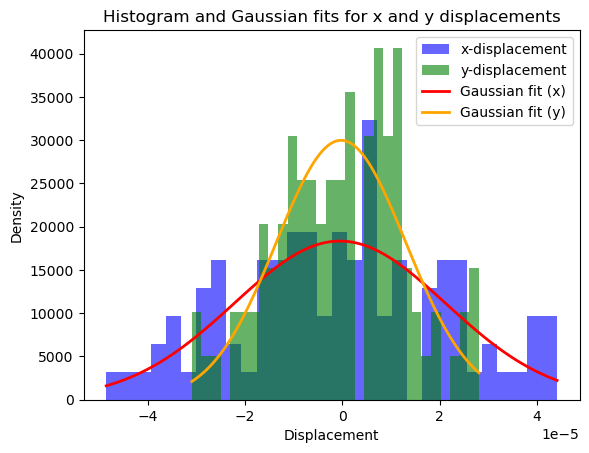

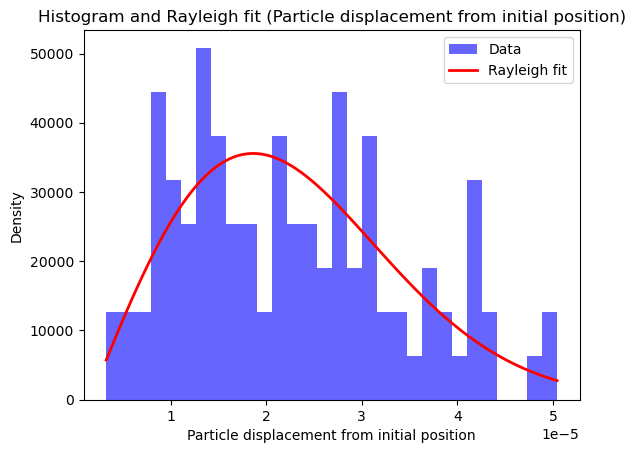

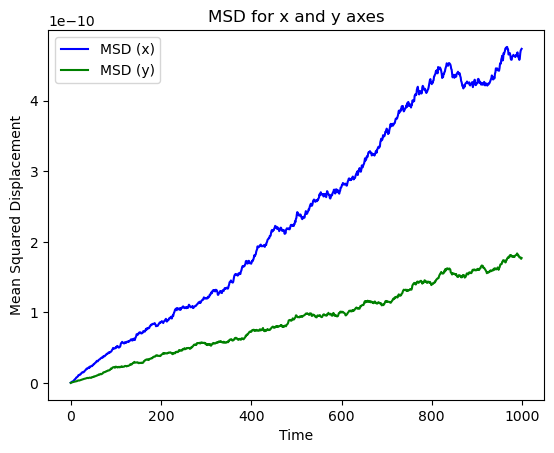

Estimated viscosity along x-axis: 0.000905 Pa.s
Estimated viscosity along y-axis: 0.002484 Pa.s


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, rayleigh
from scipy.optimize import curve_fit

# Parameters
num_steps = 1000  # Number of steps in the simulation
num_particles = 100  # Number of particles
delta_t = 1.0  # Time step (arbitrary units)
temperature = 300  # Temperature in Kelvin
particle_radius = 1e-6  # Particle radius in meters (e.g., 1 micron)

# Viscosities along the x and y axes in Pa·s (assumed different due to anisotropy)
viscosity_x = 0.001  # Viscosity along the x-axis (e.g., water at room temperature)
viscosity_y = 0.002  # Viscosity along the y-axis (e.g., different value due to anisotropy)

# Calculate the diffusion coefficients using the Stokes-Einstein equation
boltzmann_constant = 1.38e-23  # Boltzmann constant in J/K
diffusion_coefficient_x = boltzmann_constant * temperature / (6 * np.pi * viscosity_x * particle_radius)
diffusion_coefficient_y = boltzmann_constant * temperature / (6 * np.pi * viscosity_y * particle_radius)

# Arrays to store displacements and MSDs
x_displacements = np.zeros((num_particles, num_steps))
y_displacements = np.zeros((num_particles, num_steps))
msd_x = np.zeros(num_steps)
msd_y = np.zeros(num_steps)

# Perform simulation
for particle in range(num_particles):
    x = 0.0
    y = 0.0
    
    for step in range(num_steps):
        # Calculate the standard deviation for the displacement in x and y
        std_dev_x = np.sqrt(2 * diffusion_coefficient_x * delta_t)
        std_dev_y = np.sqrt(2 * diffusion_coefficient_y * delta_t)
        
        # Generate random displacement for x and y using a normal distribution
        dx = std_dev_x * np.random.normal()
        dy = std_dev_y * np.random.normal()
        
        # Update particle position
        x += dx
        y += dy
        
        # Store displacements
        x_displacements[particle, step] = x
        y_displacements[particle, step] = y
        
        # Update MSDs
        msd_x[step] += x ** 2
        msd_y[step] += y ** 2

# Average MSDs
msd_x /= num_particles
msd_y /= num_particles

# Calculate final positions and plot histogram for particle displacement from initial position
final_positions = np.sqrt(x_displacements[:, -1] ** 2 + y_displacements[:, -1] ** 2)

# Plot histograms and Gaussian fits for x and y displacements in the same plot
plt.figure()
plt.hist(x_displacements[:, -1], bins=30, density=True, alpha=0.6, color='b', label='x-displacement')
plt.hist(y_displacements[:, -1], bins=30, density=True, alpha=0.6, color='g', label='y-displacement')
mu_x, sigma_x = norm.fit(x_displacements[:, -1])
mu_y, sigma_y = norm.fit(y_displacements[:, -1])
x_vals = np.linspace(x_displacements[:, -1].min(), x_displacements[:, -1].max(), 100)
y_vals = np.linspace(y_displacements[:, -1].min(), y_displacements[:, -1].max(), 100)
plt.plot(x_vals, norm.pdf(x_vals, mu_x, sigma_x), 'r', lw=2, label='Gaussian fit (x)')
plt.plot(y_vals, norm.pdf(y_vals, mu_y, sigma_y), 'orange', lw=2, label='Gaussian fit (y)')
plt.xlabel('Displacement')
plt.ylabel('Density')
plt.title('Histogram and Gaussian fits for x and y displacements')
plt.legend()
plt.show()

# Plot the overall displacement and Rayleigh fit
plt.figure()
plt.hist(final_positions, bins=30, density=True, alpha=0.6, color='blue', label='Data')
param = rayleigh.fit(final_positions)
x_vals = np.linspace(final_positions.min(), final_positions.max(), 100)
pdf_values = rayleigh.pdf(x_vals, *param)
plt.plot(x_vals, pdf_values, 'r', lw=2, label='Rayleigh fit')
plt.xlabel('Particle displacement from initial position')
plt.ylabel('Density')
plt.title('Histogram and Rayleigh fit (Particle displacement from initial position)')
plt.legend()
plt.show()

# Plot MSD for both x and y axes
plt.figure()
plt.plot(np.arange(num_steps) * delta_t, msd_x, 'b', label='MSD (x)')
plt.plot(np.arange(num_steps) * delta_t, msd_y, 'g', label='MSD (y)')
plt.xlabel('Time')
plt.ylabel('Mean Squared Displacement')
plt.title('MSD for x and y axes')
plt.legend()
plt.show()

# Estimate viscosities from MSD fitting
def msd_fit(t, D):
    return 2 * D * t

# Fit MSD data to the msd_fit function for x and y axes
popt_x, _ = curve_fit(msd_fit, np.arange(num_steps) * delta_t, msd_x)
popt_y, _ = curve_fit(msd_fit, np.arange(num_steps) * delta_t, msd_y)

# Calculate estimated viscosities along x and y axes
estimated_diffusion_coefficient_x = popt_x[0]
estimated_diffusion_coefficient_y = popt_y[0]

estimated_viscosity_x = boltzmann_constant * temperature / (6 * np.pi * particle_radius * estimated_diffusion_coefficient_x)
estimated_viscosity_y = boltzmann_constant * temperature / (6 * np.pi * particle_radius * estimated_diffusion_coefficient_y)

print(f"Estimated viscosity along x-axis: {estimated_viscosity_x:.6f} Pa.s")
print(f"Estimated viscosity along y-axis: {estimated_viscosity_y:.6f} Pa.s")



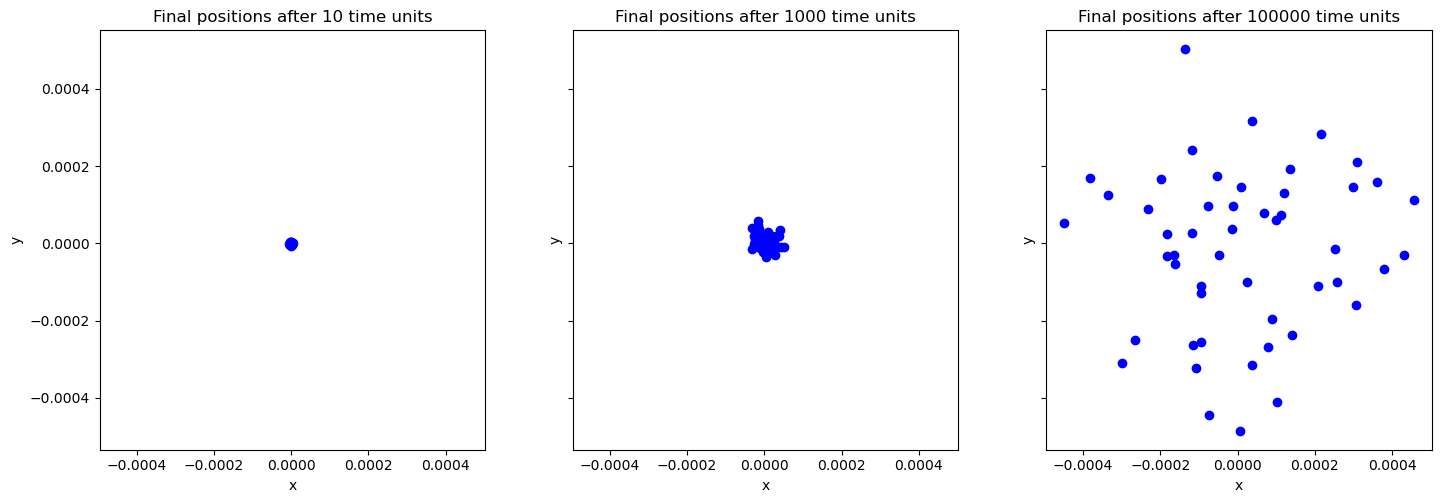

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter


# Parameters
num_particles = 50  # Number of particles
time_units = [10, 1000, 100000]  # Time units to simulate
delta_t = 1.0  # Time step (arbitrary units)
temperature = 300  # Temperature in Kelvin
particle_radius = 1e-6  # Particle radius in meters (e.g., 1 micron)
viscosity_x = 0.001  # Viscosity along the x-axis in Pa·s
viscosity_y = 0.001  # Viscosity along the y-axis in Pa·s

# Calculate the diffusion coefficients using the Stokes-Einstein equation
boltzmann_constant = 1.38e-23  # Boltzmann constant in J/K
diffusion_coefficient_x = boltzmann_constant * temperature / (6 * np.pi * viscosity_x * particle_radius)
diffusion_coefficient_y = boltzmann_constant * temperature / (6 * np.pi * viscosity_y * particle_radius)

# Define a function to simulate particle movements
def simulate_particles(num_particles, num_steps, diffusion_coefficient_x, diffusion_coefficient_y, delta_t):
    x_positions = np.zeros((num_particles, num_steps))
    y_positions = np.zeros((num_particles, num_steps))

    # Simulate the movement of each particle
    for particle in range(num_particles):
        x = 0.0
        y = 0.0
        
        for step in range(num_steps):
            # Calculate the standard deviation for the displacement in x and y
            std_dev_x = np.sqrt(2 * diffusion_coefficient_x * delta_t)
            std_dev_y = np.sqrt(2 * diffusion_coefficient_y * delta_t)
            
            # Generate random displacement using a normal distribution
            dx = std_dev_x * np.random.normal()
            dy = std_dev_y * np.random.normal()
            
            # Update particle position
            x += dx
            y += dy
            
            # Store the positions
            x_positions[particle, step] = x
            y_positions[particle, step] = y
            
    return x_positions, y_positions

# Initialize a figure
fig, axes = plt.subplots(1, len(time_units), figsize=(15, 5), sharex=True, sharey=True)

# Run simulations for the specified time units
for i, time_unit in enumerate(time_units):
    num_steps = int(time_unit / delta_t)  # Number of steps in the simulation
    x_positions, y_positions = simulate_particles(num_particles, num_steps, diffusion_coefficient_x, diffusion_coefficient_y, delta_t)
    
    # Plot the final positions of the particles
    axes[i].scatter(x_positions[:, -1], y_positions[:, -1], color='blue')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title(f'Final positions after {time_unit} time units')
    axes[i].set_aspect('equal')  # Set aspect ratio to be square for the plot


# Set the axis limits to be the same for each subplot
x_min = min([axes[i].get_xlim()[0] for i in range(len(time_units))])
x_max = max([axes[i].get_xlim()[1] for i in range(len(time_units))])
y_min = min([axes[i].get_ylim()[0] for i in range(len(time_units))])
y_max = max([axes[i].get_ylim()[1] for i in range(len(time_units))])

for ax in axes:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal')  # Set aspect ratio to be square

# Display the plots
plt.tight_layout()
plt.show()


Statistical Parameters

Autocorrelation (x-axis) shape: (19999,)
Autocorrelation (y-axis) shape: (19999,)
Kurtosis (x-axis): -0.43735170611326346
Kurtosis (y-axis): -1.00570610138491
Skewness (x-axis): -0.04210710541079749
Skewness (y-axis): 0.2608459221525989


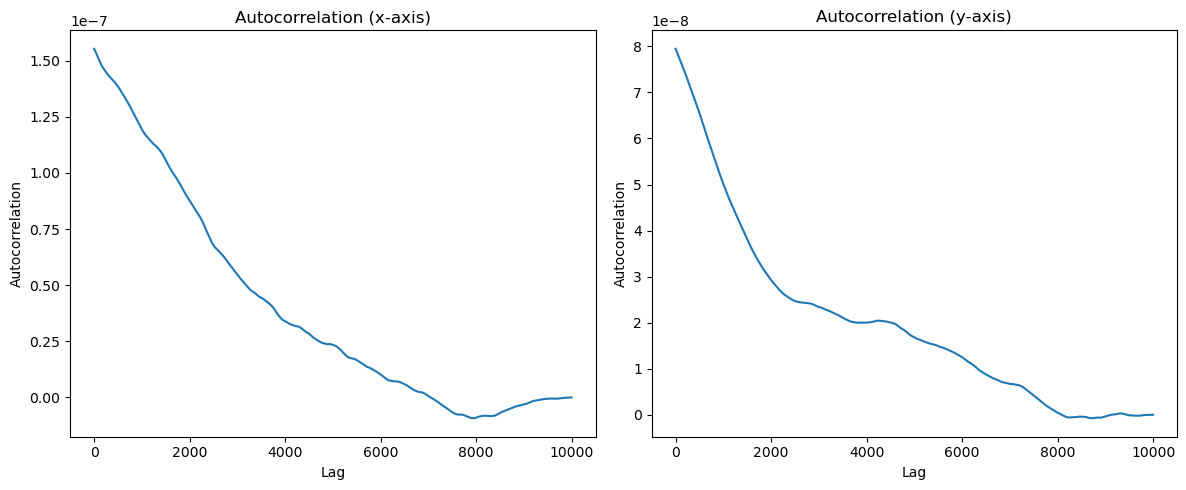

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from scipy.signal import correlate

# Parameters
num_particles = 50  # Number of particles
num_steps = 10000  # Number of time steps
delta_t = 1.0  # Time step (arbitrary units)
temperature = 300  # Temperature in Kelvin
particle_radius = 1e-6  # Particle radius in meters (e.g., 1 micron)
viscosity_x = 0.001  # Viscosity along the x-axis in Pa·s
viscosity_y = 0.01 # Viscosity along the y-axis in Pa·s

# Calculate the diffusion coefficients using the Stokes-Einstein equation
boltzmann_constant = 1.38e-23  # Boltzmann constant in J/K
diffusion_coefficient_x = boltzmann_constant * temperature / (6 * np.pi * viscosity_x * particle_radius)
diffusion_coefficient_y = boltzmann_constant * temperature / (6 * np.pi * viscosity_y * particle_radius)

# Define a function to simulate particle movements
def simulate_particles(num_particles, num_steps, diffusion_coefficient_x, diffusion_coefficient_y, delta_t):
    x_positions = np.zeros((num_particles, num_steps))
    y_positions = np.zeros((num_particles, num_steps))

    # Simulate the movement of each particle
    for particle in range(num_particles):
        x = 0.0
        y = 0.0
        
        for step in range(num_steps):
            # Calculate the standard deviation for the displacement in x and y
            std_dev_x = np.sqrt(2 * diffusion_coefficient_x * delta_t)
            std_dev_y = np.sqrt(2 * diffusion_coefficient_y * delta_t)
            
            # Generate random displacement using a normal distribution
            dx = std_dev_x * np.random.normal()
            dy = std_dev_y * np.random.normal()
            
            # Update particle position
            x += dx
            y += dy
            
            # Store the positions
            x_positions[particle, step] = x
            y_positions[particle, step] = y
            
    return x_positions, y_positions

# Simulate particles
x_positions, y_positions = simulate_particles(num_particles, num_steps, diffusion_coefficient_x, diffusion_coefficient_y, delta_t)

# Calculate autocorrelation for the mean trajectory of particles
# Calculate the mean trajectory across all particles
mean_trajectory_x = np.mean(x_positions, axis=0)
mean_trajectory_y = np.mean(y_positions, axis=0)

# Calculate autocorrelation using correlate function
autocorrelation_x = correlate(mean_trajectory_x, mean_trajectory_x, mode='full')
autocorrelation_y = correlate(mean_trajectory_y, mean_trajectory_y, mode='full')

# Calculate kurtosis and skewness for the final positions of particles
final_positions_x = x_positions[:, -1]
final_positions_y = y_positions[:, -1]

kurtosis_x = kurtosis(final_positions_x)
kurtosis_y = kurtosis(final_positions_y)

skewness_x = skew(final_positions_x)
skewness_y = skew(final_positions_y)

# Display results
print(f'Autocorrelation (x-axis) shape: {autocorrelation_x.shape}')
print(f'Autocorrelation (y-axis) shape: {autocorrelation_y.shape}')
print(f'Kurtosis (x-axis): {kurtosis_x}')
print(f'Kurtosis (y-axis): {kurtosis_y}')
print(f'Skewness (x-axis): {skewness_x}')
print(f'Skewness (y-axis): {skewness_y}')

# Plotting autocorrelation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(autocorrelation_x[len(autocorrelation_x) // 2:])
ax1.set_title('Autocorrelation (x-axis)')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')

ax2.plot(autocorrelation_y[len(autocorrelation_y) // 2:])
ax2.set_title('Autocorrelation (y-axis)')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Autocorrelation')

plt.tight_layout()
plt.show()


LCs in 3D

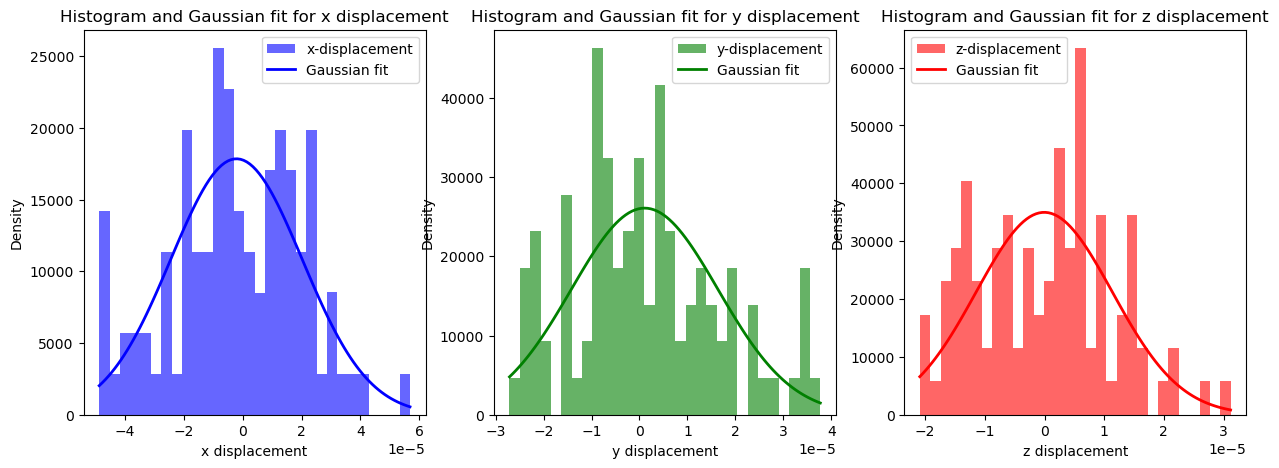

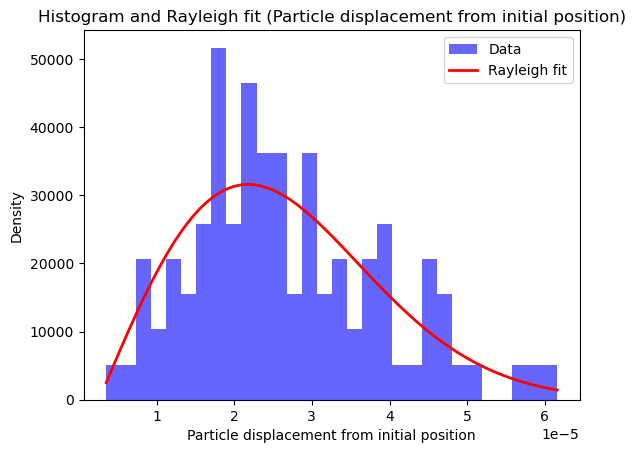

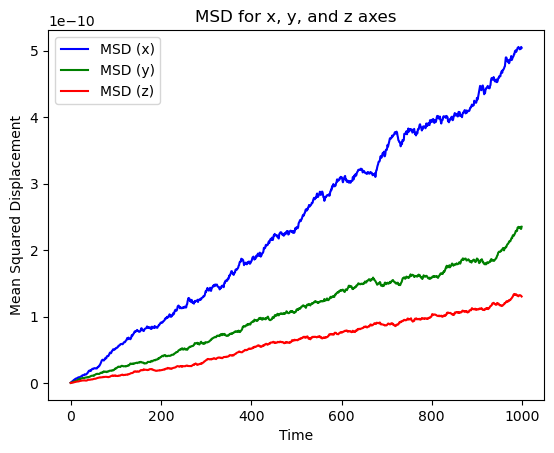

Estimated viscosity along x-axis: 0.000901 Pa.s
Estimated viscosity along y-axis: 0.002058 Pa.s
Estimated viscosity along z-axis: 0.003504 Pa.s


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, rayleigh
from scipy.optimize import curve_fit

# Parameters
num_steps = 1000  # Number of steps in the simulation
num_particles = 100  # Number of particles
delta_t = 1.0  # Time step (arbitrary units)
temperature = 300  # Temperature in Kelvin
particle_radius = 1e-6  # Particle radius in meters (e.g., 1 micron)

# Viscosities along the x, y, and z axes in Pa·s (assumed different due to anisotropy)
viscosity_x = 0.001  # Viscosity along the x-axis
viscosity_y = 0.002  # Viscosity along the y-axis
viscosity_z = 0.003  # Viscosity along the z-axis

# Calculate the diffusion coefficients using the Stokes-Einstein equation
boltzmann_constant = 1.38e-23  # Boltzmann constant in J/K
diffusion_coefficient_x = boltzmann_constant * temperature / (6 * np.pi * viscosity_x * particle_radius)
diffusion_coefficient_y = boltzmann_constant * temperature / (6 * np.pi * viscosity_y * particle_radius)
diffusion_coefficient_z = boltzmann_constant * temperature / (6 * np.pi * viscosity_z * particle_radius)

# Arrays to store displacements and MSDs
x_displacements = np.zeros((num_particles, num_steps))
y_displacements = np.zeros((num_particles, num_steps))
z_displacements = np.zeros((num_particles, num_steps))
msd_x = np.zeros(num_steps)
msd_y = np.zeros(num_steps)
msd_z = np.zeros(num_steps)

# Perform simulation
for particle in range(num_particles):
    x = 0.0
    y = 0.0
    z = 0.0
    
    for step in range(num_steps):
        # Calculate the standard deviation for the displacement in x, y, and z
        std_dev_x = np.sqrt(2 * diffusion_coefficient_x * delta_t)
        std_dev_y = np.sqrt(2 * diffusion_coefficient_y * delta_t)
        std_dev_z = np.sqrt(2 * diffusion_coefficient_z * delta_t)
        
        # Generate random displacement for x, y, and z using a normal distribution
        dx = std_dev_x * np.random.normal()
        dy = std_dev_y * np.random.normal()
        dz = std_dev_z * np.random.normal()
        
        # Update particle position
        x += dx
        y += dy
        z += dz
        
        # Store displacements
        x_displacements[particle, step] = x
        y_displacements[particle, step] = y
        z_displacements[particle, step] = z
        
        # Update MSDs
        msd_x[step] += x ** 2
        msd_y[step] += y ** 2
        msd_z[step] += z ** 2

# Average MSDs
msd_x /= num_particles
msd_y /= num_particles
msd_z /= num_particles

# Calculate final positions and plot histogram for particle displacement from initial position
final_positions = np.sqrt(x_displacements[:, -1] ** 2 + y_displacements[:, -1] ** 2 + z_displacements[:, -1] ** 2)

# Plot histograms and Gaussian fits for x, y, and z displacements
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(x_displacements[:, -1], bins=30, density=True, alpha=0.6, color='b', label='x-displacement')
axes[1].hist(y_displacements[:, -1], bins=30, density=True, alpha=0.6, color='g', label='y-displacement')
axes[2].hist(z_displacements[:, -1], bins=30, density=True, alpha=0.6, color='r', label='z-displacement')

for i, (displacement_data, ax, color, axis_label) in enumerate(zip([x_displacements[:, -1], y_displacements[:, -1], z_displacements[:, -1]], axes, ['b', 'g', 'r'], ['x', 'y', 'z'])):
    mu, sigma = norm.fit(displacement_data)
    x_vals = np.linspace(displacement_data.min(), displacement_data.max(), 100)
    ax.plot(x_vals, norm.pdf(x_vals, mu, sigma), color, lw=2, label='Gaussian fit')
    ax.set_xlabel(f'{axis_label} displacement')
    ax.set_ylabel('Density')
    ax.set_title(f'Histogram and Gaussian fit for {axis_label} displacement')
    ax.legend()

plt.show()

# Plot the overall displacement and Rayleigh fit
plt.figure()
plt.hist(final_positions, bins=30, density=True, alpha=0.6, color='blue', label='Data')
param = rayleigh.fit(final_positions)
x_vals = np.linspace(final_positions.min(), final_positions.max(), 100)
pdf_values = rayleigh.pdf(x_vals, *param)
plt.plot(x_vals, pdf_values, 'r', lw=2, label='Rayleigh fit')
plt.xlabel('Particle displacement from initial position')
plt.ylabel('Density')
plt.title('Histogram and Rayleigh fit (Particle displacement from initial position)')
plt.legend()
plt.show()

# Plot MSD for the x, y, and z axes
plt.figure()
plt.plot(np.arange(num_steps) * delta_t, msd_x, 'b', label='MSD (x)')
plt.plot(np.arange(num_steps) * delta_t, msd_y, 'g', label='MSD (y)')
plt.plot(np.arange(num_steps) * delta_t, msd_z, 'r', label='MSD (z)')
plt.xlabel('Time')
plt.ylabel('Mean Squared Displacement')
plt.title('MSD for x, y, and z axes')
plt.legend()
plt.show()

# Estimate viscosities from MSD fitting
def msd_fit(t, D):
    return 2 * D * t

# Fit MSD data to the msd_fit function for x, y, and z axes
popt_x, _ = curve_fit(msd_fit, np.arange(num_steps) * delta_t, msd_x)
popt_y, _ = curve_fit(msd_fit, np.arange(num_steps) * delta_t, msd_y)
popt_z, _ = curve_fit(msd_fit, np.arange(num_steps) * delta_t, msd_z)

# Calculate estimated viscosities along x, y, and z axes
estimated_diffusion_coefficient_x = popt_x[0]
estimated_diffusion_coefficient_y = popt_y[0]
estimated_diffusion_coefficient_z = popt_z[0]

estimated_viscosity_x = boltzmann_constant * temperature / (6 * np.pi * particle_radius * estimated_diffusion_coefficient_x)
estimated_viscosity_y = boltzmann_constant * temperature / (6 * np.pi * particle_radius * estimated_diffusion_coefficient_y)
estimated_viscosity_z = boltzmann_constant * temperature / (6 * np.pi * particle_radius * estimated_diffusion_coefficient_z)

print(f"Estimated viscosity along x-axis: {estimated_viscosity_x:.6f} Pa.s")
print(f"Estimated viscosity along y-axis: {estimated_viscosity_y:.6f} Pa.s")
print(f"Estimated viscosity along z-axis: {estimated_viscosity_z:.6f} Pa.s")


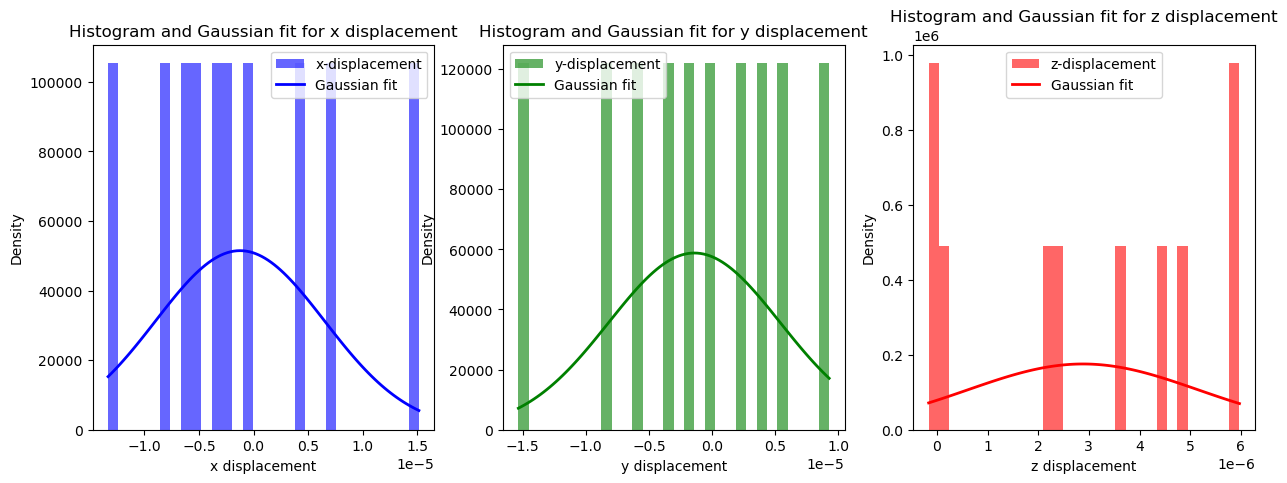

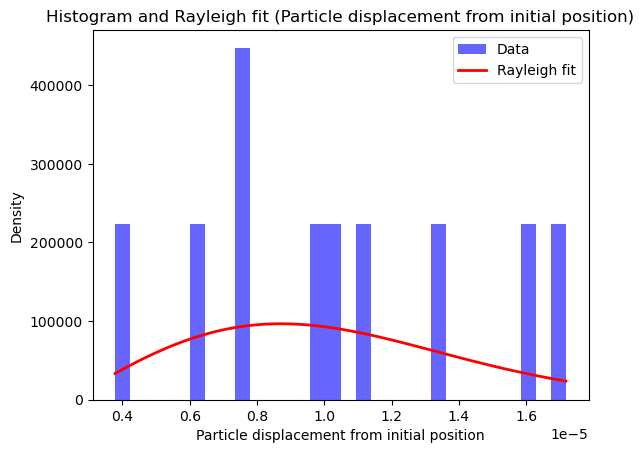

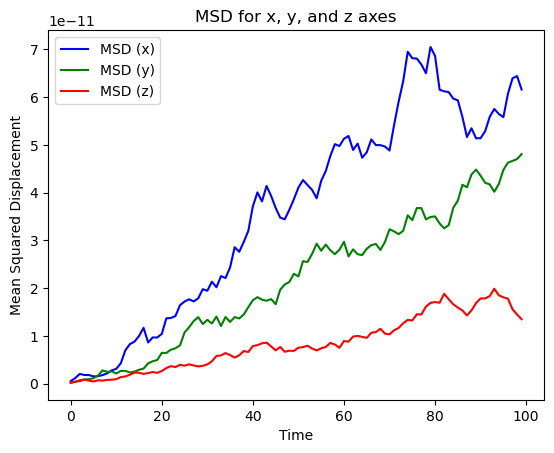

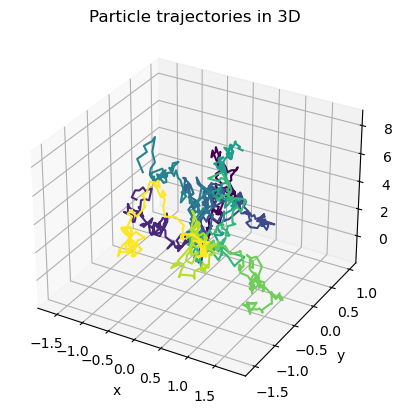

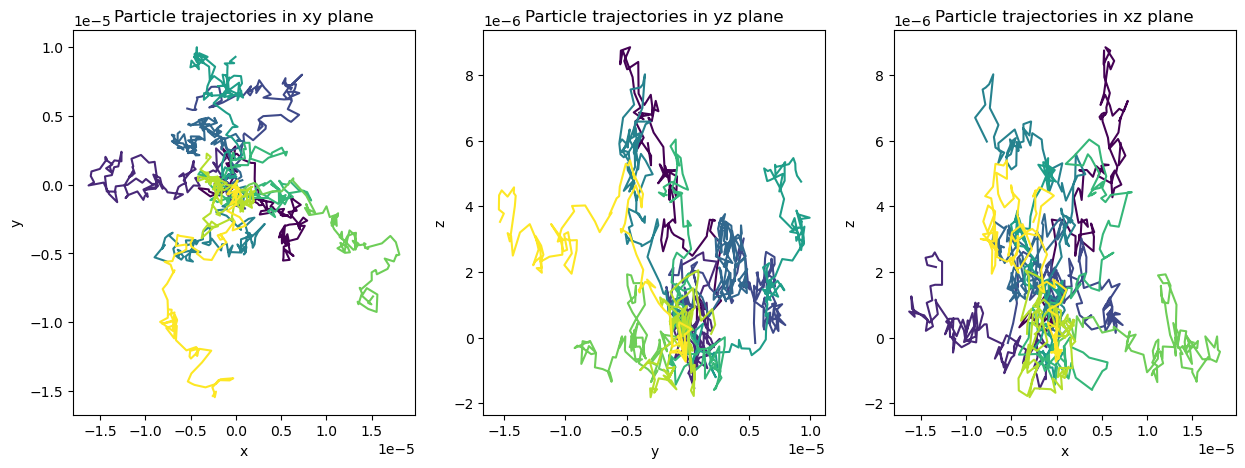

Estimated viscosity along x-axis: 0.000605 Pa.s
Estimated viscosity along y-axis: 0.000970 Pa.s
Estimated viscosity along z-axis: 0.002511 Pa.s


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, rayleigh
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

# Parameters
num_steps = 100  # Number of steps in the simulation
num_particles = 10  # Number of particles
delta_t = 1.0  # Time step (arbitrary units)
temperature = 300  # Temperature in Kelvin
particle_radius = 1e-6  # Particle radius in meters (e.g., 1 micron)

# Viscosities along the x, y, and z axes in Pa·s (assumed different due to anisotropy)
viscosity_x = 0.001  # Viscosity along the x-axis
viscosity_y = 0.002  # Viscosity along the y-axis
viscosity_z = 0.003  # Viscosity along the z-axis

# Calculate the diffusion coefficients using the Stokes-Einstein equation
boltzmann_constant = 1.38e-23  # Boltzmann constant in J/K
diffusion_coefficient_x = boltzmann_constant * temperature / (6 * np.pi * viscosity_x * particle_radius)
diffusion_coefficient_y = boltzmann_constant * temperature / (6 * np.pi * viscosity_y * particle_radius)
diffusion_coefficient_z = boltzmann_constant * temperature / (6 * np.pi * viscosity_z * particle_radius)

# Arrays to store displacements and MSDs
x_displacements = np.zeros((num_particles, num_steps))
y_displacements = np.zeros((num_particles, num_steps))
z_displacements = np.zeros((num_particles, num_steps))
msd_x = np.zeros(num_steps)
msd_y = np.zeros(num_steps)
msd_z = np.zeros(num_steps)

# Perform simulation
for particle in range(num_particles):
    x = 0.0
    y = 0.0
    z = 0.0
    
    for step in range(num_steps):
        # Calculate the standard deviation for the displacement in x, y, and z
        std_dev_x = np.sqrt(2 * diffusion_coefficient_x * delta_t)
        std_dev_y = np.sqrt(2 * diffusion_coefficient_y * delta_t)
        std_dev_z = np.sqrt(2 * diffusion_coefficient_z * delta_t)
        
        # Generate random displacement for x, y, and z using a normal distribution
        dx = std_dev_x * np.random.normal()
        dy = std_dev_y * np.random.normal()
        dz = std_dev_z * np.random.normal()
        
        # Update particle position
        x += dx
        y += dy
        z += dz
        
        # Store displacements
        x_displacements[particle, step] = x
        y_displacements[particle, step] = y
        z_displacements[particle, step] = z
        
        # Update MSDs
        msd_x[step] += x ** 2
        msd_y[step] += y ** 2
        msd_z[step] += z ** 2

# Average MSDs
msd_x /= num_particles
msd_y /= num_particles
msd_z /= num_particles

# Calculate final positions and plot histogram for particle displacement from initial position
final_positions = np.sqrt(x_displacements[:, -1] ** 2 + y_displacements[:, -1] ** 2 + z_displacements[:, -1] ** 2)

# Plot histograms and Gaussian fits for x, y, and z displacements
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(x_displacements[:, -1], bins=30, density=True, alpha=0.6, color='b', label='x-displacement')
axes[1].hist(y_displacements[:, -1], bins=30, density=True, alpha=0.6, color='g', label='y-displacement')
axes[2].hist(z_displacements[:, -1], bins=30, density=True, alpha=0.6, color='r', label='z-displacement')

for i, (displacement_data, ax, color, axis_label) in enumerate(zip([x_displacements[:, -1], y_displacements[:, -1], z_displacements[:, -1]], axes, ['b', 'g', 'r'], ['x', 'y', 'z'])):
    mu, sigma = norm.fit(displacement_data)
    x_vals = np.linspace(displacement_data.min(), displacement_data.max(), 100)
    ax.plot(x_vals, norm.pdf(x_vals, mu, sigma), color, lw=2, label='Gaussian fit')
    ax.set_xlabel(f'{axis_label} displacement')
    ax.set_ylabel('Density')
    ax.set_title(f'Histogram and Gaussian fit for {axis_label} displacement')
    ax.legend()

plt.show()

# Plot the overall displacement and Rayleigh fit
plt.figure()
plt.hist(final_positions, bins=30, density=True, alpha=0.6, color='blue', label='Data')
param = rayleigh.fit(final_positions)
x_vals = np.linspace(final_positions.min(), final_positions.max(), 100)
pdf_values = rayleigh.pdf(x_vals, *param)
plt.plot(x_vals, pdf_values, 'r', lw=2, label='Rayleigh fit')
plt.xlabel('Particle displacement from initial position')
plt.ylabel('Density')
plt.title('Histogram and Rayleigh fit (Particle displacement from initial position)')
plt.legend()
plt.show()

# Plot MSD for the x, y, and z axes
plt.figure()
plt.plot(np.arange(num_steps) * delta_t, msd_x, 'b', label='MSD (x)')
plt.plot(np.arange(num_steps) * delta_t, msd_y, 'g', label='MSD (y)')
plt.plot(np.arange(num_steps) * delta_t, msd_z, 'r', label='MSD (z)')
plt.xlabel('Time')
plt.ylabel('Mean Squared Displacement')
plt.title('MSD for x, y, and z axes')
plt.legend()
plt.show()

# Plot particle trajectories in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.viridis(np.linspace(0, 1, num_particles))
for particle in range(num_particles):
    ax.plot(x_displacements[particle], y_displacements[particle], z_displacements[particle], color=colors[particle])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Particle trajectories in 3D')
plt.show()

# Plot particle trajectories in xy, yz, and xz planes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = plt.cm.viridis(np.linspace(0, 1, num_particles))

# Plot in xy plane
for particle in range(num_particles):
    axes[0].plot(x_displacements[particle], y_displacements[particle], color=colors[particle])
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Particle trajectories in xy plane')

# Plot in yz plane
for particle in range(num_particles):
    axes[1].plot(y_displacements[particle], z_displacements[particle], color=colors[particle])
axes[1].set_xlabel('y')
axes[1].set_ylabel('z')
axes[1].set_title('Particle trajectories in yz plane')

# Plot in xz plane
for particle in range(num_particles):
    axes[2].plot(x_displacements[particle], z_displacements[particle], color=colors[particle])
axes[2].set_xlabel('x')
axes[2].set_ylabel('z')
axes[2].set_title('Particle trajectories in xz plane')

plt.show()

# Estimate viscosities from MSD fitting
def msd_fit(t, D):
    return 2 * D * t

# Fit MSD data to the msd_fit function for x, y, and z axes
popt_x, _ = curve_fit(msd_fit, np.arange(num_steps) * delta_t, msd_x)
popt_y, _ = curve_fit(msd_fit, np.arange(num_steps) * delta_t, msd_y)
popt_z, _ = curve_fit(msd_fit, np.arange(num_steps) * delta_t, msd_z)

# Calculate estimated viscosities along x, y, and z axes
estimated_diffusion_coefficient_x = popt_x[0]
estimated_diffusion_coefficient_y = popt_y[0]
estimated_diffusion_coefficient_z = popt_z[0]

estimated_viscosity_x = boltzmann_constant * temperature / (6 * np.pi * particle_radius * estimated_diffusion_coefficient_x)
estimated_viscosity_y = boltzmann_constant * temperature / (6 * np.pi * particle_radius * estimated_diffusion_coefficient_y)
estimated_viscosity_z = boltzmann_constant * temperature / (6 * np.pi * particle_radius * estimated_diffusion_coefficient_z)

print(f"Estimated viscosity along x-axis: {estimated_viscosity_x:.6f} Pa.s")
print(f"Estimated viscosity along y-axis: {estimated_viscosity_y:.6f} Pa.s")
print(f"Estimated viscosity along z-axis: {estimated_viscosity_z:.6f} Pa.s")
